# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [13]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_DQN/VN_P1_DQN.csv"
rb_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_RB_2/VN_P1_RB_2.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'energy']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [14]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,construction_config,internal_mass,latitud,longitud,altitud,beta,E_max,rad,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8.759000e+03,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,15.700365,27.193807,4.277813,201.389542,54.463828,29.769184,1.356180e+07,1.655026e+02,0.131864,0.131864,...,196.489253,3.711486,3.746041,0.008323,12.571138,64.998055,202.306751,3.654883,-18.901600,18.901600
std,7.843632,5.266797,2.309813,96.639529,18.648707,15.540370,1.446840e+07,1.219669e+04,0.338363,0.338363,...,99.215787,2.241010,10.457200,0.237944,6.420321,15.162862,100.612036,2.226795,20.140720,20.140720
min,-4.316667,18.873147,0.100000,0.000000,16.000000,4.218399,0.000000e+00,0.000000e+00,0.000000,0.000000,...,-62.982633,-1.182337,-31.857883,-0.751794,-4.227098,10.543230,-48.400016,-1.128864,-98.992289,0.000000
25%,9.975000,22.499394,2.533333,153.000000,39.166667,17.277730,3.471434e+05,0.000000e+00,0.000000,0.000000,...,140.493679,2.019774,-3.286924,-0.133600,7.519490,54.229627,149.229620,1.948211,-31.160871,0.442699
50%,15.800000,25.078694,3.966667,212.000000,54.000000,27.249008,9.030893e+06,0.000000e+00,0.000000,0.000000,...,208.083411,3.330978,3.718390,0.000579,12.774965,64.817855,213.303282,3.297158,-12.604035,12.604035
75%,21.308333,32.481051,5.700000,262.166667,68.666667,39.427760,2.231038e+07,0.000000e+00,0.000000,0.000000,...,263.102197,5.099197,10.899369,0.137825,18.004536,75.366266,271.527971,5.141970,-0.442699,31.160871
max,37.650000,37.319667,14.500000,359.833333,100.000000,100.000000,7.670426e+07,1.080029e+06,1.000000,1.000000,...,412.264196,11.408797,48.070088,2.681311,27.566619,115.082300,419.422542,11.682193,-0.000000,98.992289


In [15]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,construction_config,internal_mass,latitud,longitud,altitud,beta,E_max,rad,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8.759000e+03,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,15.700365,26.634533,4.277813,201.389542,54.463828,69.205498,1.266646e+06,4.846169e+02,0.191917,0.191917,...,196.873926,3.708104,3.472013,0.009039,12.552737,65.093658,202.192276,3.645276,-1.685068,1.685068
std,7.843632,4.643531,2.309813,96.639529,18.648707,22.859215,1.765201e+06,3.493479e+04,0.393831,0.393831,...,99.165683,2.252735,10.485640,0.239256,6.427622,15.234730,100.464142,2.221230,2.321319,2.321319
min,-4.316667,19.389425,0.100000,0.000000,16.000000,9.198457,0.000000e+00,0.000000e+00,0.000000,0.000000,...,-50.873675,-1.054107,-32.623520,-0.769069,-4.487641,10.832508,-55.079648,-1.022280,-63.957836,0.000000
25%,9.975000,22.099038,2.533333,153.000000,39.166667,50.460708,0.000000e+00,0.000000e+00,0.000000,0.000000,...,140.158258,2.005955,-3.667873,-0.131109,7.534842,54.321049,147.947221,1.922592,-3.062130,0.000000
50%,15.800000,25.835884,3.966667,212.000000,54.000000,69.734972,5.354477e+05,0.000000e+00,0.000000,0.000000,...,208.249388,3.339275,3.603467,0.000647,12.745144,64.733961,213.091869,3.278222,-0.772138,0.772138
75%,21.308333,31.111117,5.700000,262.166667,68.666667,91.053053,2.264759e+06,0.000000e+00,0.000000,0.000000,...,262.875483,5.110600,10.409558,0.134690,17.959498,75.868191,271.523858,5.120091,-0.000000,3.062130
max,37.650000,37.515006,14.500000,359.833333,100.000000,100.000000,4.219340e+07,3.244431e+06,1.000000,1.000000,...,415.403406,11.225986,49.098259,2.988688,27.818076,115.335168,412.958789,11.218448,-0.000000,63.957836


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [16]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(drl_data_cleaned[column_name], label='DRL')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


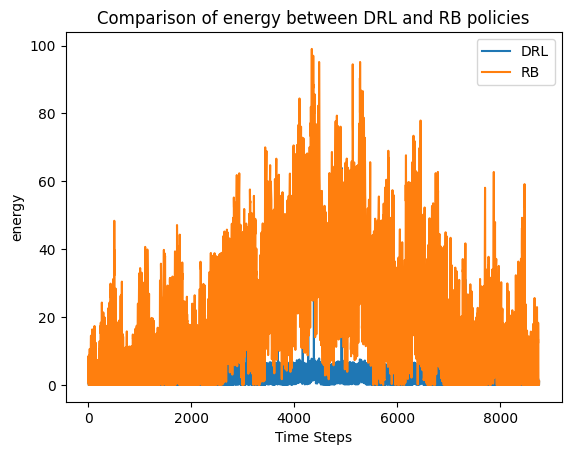

In [17]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

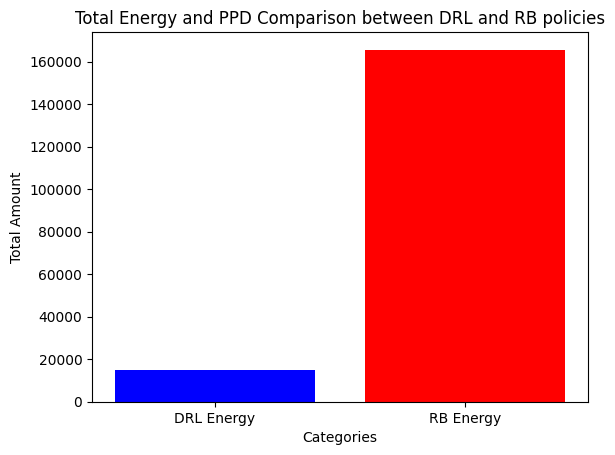

In [18]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()

rb_total_energy = rb_data_cleaned[energy_column].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [ ]:
# Define the columns representing 'energy' and 'comfort'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL PPD', 'RB PPD']
values = [drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [19]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
#drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
#print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: -91.09%



## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

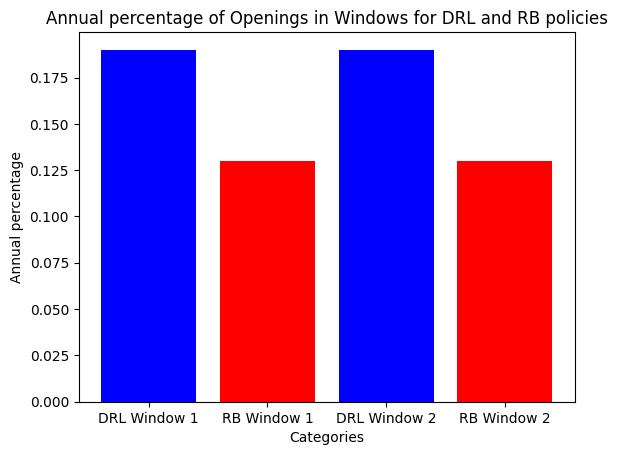

In [20]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],2)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

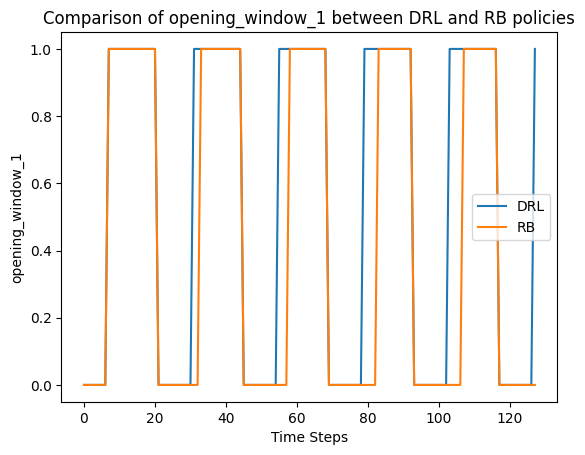

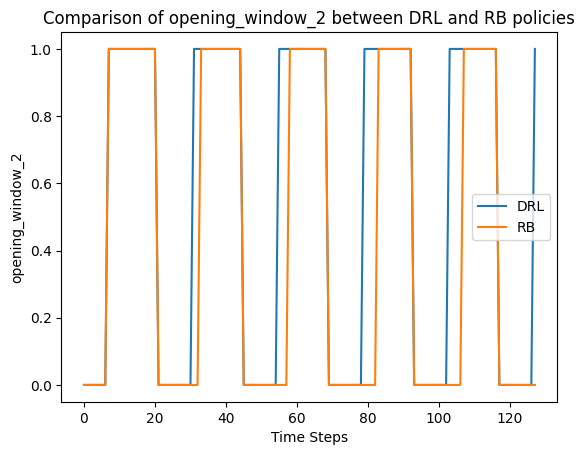

In [21]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:128],
    rb_data_cleaned=rb_data_cleaned.iloc[:128],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:128],
    rb_data_cleaned=rb_data_cleaned.iloc[:128],
    column_name=column_name
    )

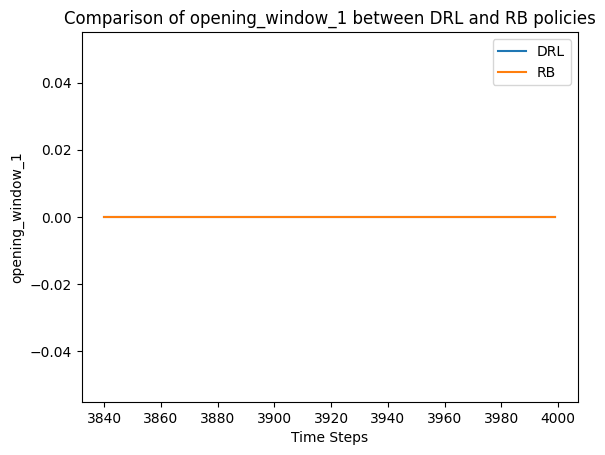

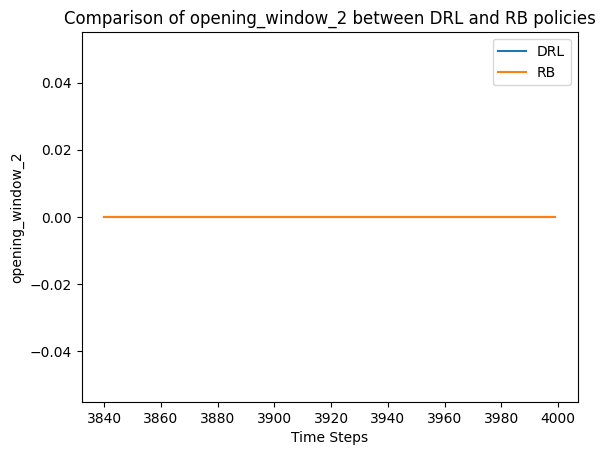

In [24]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:4000],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:4000],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[3840:4000],
    rb_data_cleaned=rb_data_cleaned.iloc[3840:4000],
    column_name=column_name
    )